In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
train_dir = 'data'
os.listdir(train_dir)

['bear', 'cat', 'deer', 'dog', 'lion']

In [3]:
transforms = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(), transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])])

In [4]:
train_data = ImageFolder(train_dir, transform = transforms)

In [5]:
type(train_data)

torchvision.datasets.folder.ImageFolder

In [6]:
train_data.class_to_idx

{'bear': 0, 'cat': 1, 'deer': 2, 'dog': 3, 'lion': 4}

In [7]:
train_data.imgs[:10]

[('data\\bear\\bear (1).jpeg', 0),
 ('data\\bear\\bear (1).jpg', 0),
 ('data\\bear\\bear (1).png', 0),
 ('data\\bear\\bear (10).jpeg', 0),
 ('data\\bear\\bear (10).jpg', 0),
 ('data\\bear\\bear (100).jpg', 0),
 ('data\\bear\\bear (101).jpg', 0),
 ('data\\bear\\bear (102).jpg', 0),
 ('data\\bear\\bear (103).jpg', 0),
 ('data\\bear\\bear (104).jpg', 0)]

In [8]:
train_data[0][0].shape

torch.Size([3, 224, 224])

In [9]:
train_data[0][1]

0

Text(0.5, 1.0, '[0]')

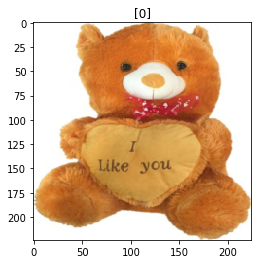

In [10]:
sample_img = train_data[0][0].numpy().transpose(1,2,0)
mean = np.array([0.5,0.5,0.5])
std = np.array([0.5,0.5,0.5])
inp = std * sample_img +mean
inp = np.clip(inp, 0, 1)
plt.imshow(inp)
plt.title([(train_data[0][1])])

In [11]:
dataloader = DataLoader(train_data, batch_size = 4, shuffle = False, num_workers=0)

In [12]:
train_loader = iter(dataloader)

In [13]:
dataloader

In [14]:
train_loader

In [15]:
x, y = next(train_loader)

In [16]:
print(x.shape, y.shape,y)

torch.Size([4, 3, 224, 224]) torch.Size([4]) tensor([0, 0, 0, 0])


In [17]:
net = torchvision.models.resnet50(pretrained=True)


In [18]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [19]:
net

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)

def accuracy(out, labels):
    _,pred = torch.max(out, dim=1)
    return torch.sum(pred==labels).item()

num_ftrs = net.fc.in_features
net.fc = nn.Linear(num_ftrs, 224)

In [21]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
#         if i % 2000 == 1999:    # print every 2000 mini-batches
        print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss)) 
        running_loss = 0.0
        

print('Finished Training')

[1,     1] loss: 5.585
[1,     2] loss: 5.558
[1,     3] loss: 5.567
[1,     4] loss: 5.546
[1,     5] loss: 5.566
[1,     6] loss: 5.557
[1,     7] loss: 5.553
[1,     8] loss: 5.570
[1,     9] loss: 5.535
[1,    10] loss: 5.550
[1,    11] loss: 5.539
[1,    12] loss: 5.580
[1,    13] loss: 5.572
[1,    14] loss: 5.552
[1,    15] loss: 5.573
[1,    16] loss: 5.529
[1,    17] loss: 5.559
[1,    18] loss: 5.565
[1,    19] loss: 5.544
[1,    20] loss: 5.553
[1,    21] loss: 5.527
[1,    22] loss: 5.531
[1,    23] loss: 5.585
[1,    24] loss: 5.538
[1,    25] loss: 5.543
[1,    26] loss: 5.558
[1,    27] loss: 5.536
[1,    28] loss: 5.567
[1,    29] loss: 5.552
[1,    30] loss: 5.554
[1,    31] loss: 5.576
[1,    32] loss: 5.537
[1,    33] loss: 5.549
[1,    34] loss: 5.549
[1,    35] loss: 5.548
[1,    36] loss: 5.523
[1,    37] loss: 5.546
[1,    38] loss: 5.534
[1,    39] loss: 5.545
[1,    40] loss: 5.534
[1,    41] loss: 5.539
[1,    42] loss: 5.549
[1,    43] loss: 5.535
[1,    44] 

C:\ProgramData\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


[1,   233] loss: 5.443
[1,   234] loss: 5.420
[1,   235] loss: 5.409
[1,   236] loss: 5.404
[1,   237] loss: 5.415
[1,   238] loss: 5.423
[1,   239] loss: 5.415
[1,   240] loss: 5.414
[1,   241] loss: 5.414
[1,   242] loss: 5.409
[1,   243] loss: 5.391
[1,   244] loss: 5.411
[1,   245] loss: 5.393
[1,   246] loss: 5.419
[1,   247] loss: 5.428
[1,   248] loss: 5.427
[1,   249] loss: 5.398
[1,   250] loss: 5.419
[1,   251] loss: 5.426
[1,   252] loss: 5.402
[1,   253] loss: 5.398
[1,   254] loss: 5.421
[1,   255] loss: 5.401
[1,   256] loss: 5.386
Finished Training


import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import os
import matplotlib.pyplot as plt
transforms = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(), transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])])
train_data = ImageFolder(train_dir, transform = transforms)
dataloader = DataLoader(train_data, batch_size = 4, shuffle = False, num_workers=0)
for epoch in range(10):  # loop over the dataset multiple times

    ep_loss = 0
    ep_acc = []
    
    for j, data in enumerate(dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        print(labels)

print('Finished Training')